In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Display plots in notebook
%matplotlib inline


Matplotlib is building the font cache; this may take a moment.


In [3]:
# Load the CSV dataset
df = pd.read_csv("sales_data_sample.csv", encoding='latin1')  # or try 'ISO-8859-1'
df.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [4]:
#Update order date type
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

#Calculate Total Revenue
df['TotalRevenue'] = df['QUANTITYORDERED'] * df['PRICEEACH']

#Remove rows with na
df.dropna(subset=['ORDERDATE', 'QUANTITYORDERED', 'PRICEEACH'], inplace=True)



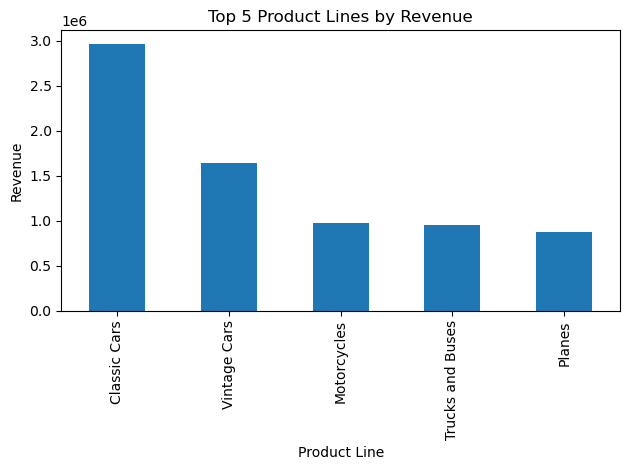

In [11]:
#Create chart for top 5 products by revenue, save, display
top_products = df.groupby('PRODUCTLINE')['TotalRevenue'].sum().sort_values(ascending=False).head(5)

top_products.plot(kind='bar', title='Top 5 Product Lines by Revenue')
plt.ylabel('Revenue')
plt.xlabel('Product Line')
plt.tight_layout()
plt.savefig("top_products.png")
plt.show()


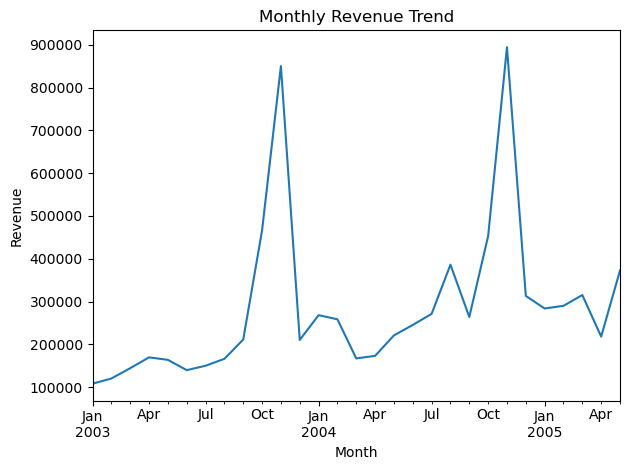

In [7]:
#Create chart of revenue by month, save, display
monthly_revenue = df.resample('ME', on='ORDERDATE')['TotalRevenue'].sum()

monthly_revenue.plot(kind='line', title='Monthly Revenue Trend')
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.tight_layout()
plt.savefig("monthly_revenue.png")
plt.show()


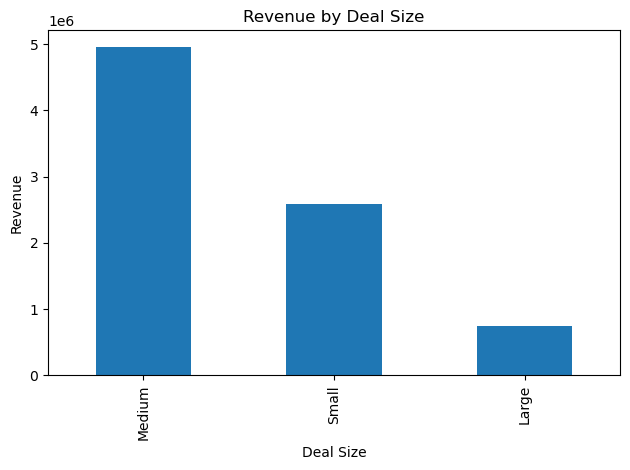

In [12]:
#Create chart of revenue by deal size, save, display
deal_size = df.groupby('DEALSIZE')['TotalRevenue'].sum().sort_values(ascending=False)

deal_size.plot(kind='bar', title='Revenue by Deal Size')
plt.ylabel('Revenue')
plt.xlabel('Deal Size')
plt.tight_layout()
plt.savefig("revenue_by_deal.png")
plt.show()


In [9]:
#Export cleaned data file
df.to_csv("cleaned_sales_data.csv", index=False)
